<center> Choose Bucket using betweenness centrality on descending values </center>
---

In [1]:
# First Import the libraries needed;

# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline
sns.set_style("whitegrid")
from IPython.core.display import display, HTML

import sys
sys.path.append('../../')

# proalign libraries
import string_db
import interface
import organism
import align
import constants as cs

In [2]:
# basic percent generator if is number
def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    try:
        return "{{:{}%}}".format(precision).format(float(v))
    except:
        return v

In [3]:
%%capture
# Initialization:

# organism names and IDs
organism_ids = ['4932', '7227', '9606']
organism_names = ['yeast', 'fly', 'human']

organism_ids = ['4932', '7227']
organism_names = ['yeast', 'fly']

# read organism PPI networks
organism_objs = [x for x in map(string_db.parse_organism, organism_ids)]

In [4]:
# a function to run an alignment and return the results (make sure to update constants if needed)
def alignment_result(orgs, align_method, similarity_mode='raw_blast'):
    # sort ids
    orgs.sort()
    
    # get Organism network objects
    orgobjs = [organism_objs[organism_ids.index(x)] for x in orgs]

    # create the combined biological alignment network
    bio_net = organism.BioNet(orgobjs[0], orgobjs[1], similarity_mode)
    
    # create aligner object
    aligner = align.Aligner(align_method)
    
    # align the networks
    aligner.align(bio_net)
    
    # create a dictionary for the results and fill
    results = {}
    results['CE'] = aligner.ce
    results['EC'] = aligner.ec
    results['LCCS'] = aligner.lccs
    results['ICS'] = aligner.ics
    results['S^3'] = aligner.s3
    # results['GOC'] = aligner.GOC
    # results['PWS1'] = aligner.PWS1
    # results['PWS2'] = aligner.PWS2
    # results['NBS'] = aligner.nbs
    results['Frobenius Norm'] = aligner.frobenius
    
    # return all results
    return results

## Algorithms Comparison:

Let's see how different algorithms score on various datasets:

---

In [5]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
other_algs = ['isoN', 'NETAL', 'pinalog', 'CGRAAL', 'GRAAL', 'MIGRAAL', 'HubAlign', 'MAGNA', 'PROPER',
        'SPINAL-I', 'SPINAL-II']

other_alg_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in other_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=other_algs, columns=columns)
        other_alg_dfs[name] = df

In [6]:
# Or view all scores combined:

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([other_alg_dfs[x] for x in net_names], axis=0, keys=net_names)

CE        EC  LCCS       ICS       S^3  Frobenius Norm
yeast-fly isoN        6990  0.509512   544  0.774429  0.443669      172.232401
          NETAL        212  0.015453    35  0.010716  0.006368      253.373242
          pinalog     9400  0.685181   731  0.561898  0.446598      165.402539
          CGRAAL      5688  0.414607   661  0.273857  0.197493      216.041663
          GRAAL       5944  0.433268   210  0.342357  0.236464      213.658606
          MIGRAAL     5925  0.431883   549  0.305870  0.218112      213.836386
          HubAlign    8605  0.627232   224  0.414319  0.332458      187.098904
          MAGNA         95  0.006925    17  0.005149  0.002962      262.766056
          PROPER     10039  0.731759   771  0.525437  0.440578      161.027948
          SPINAL-I    9690  0.706320   737  0.489147  0.406477      167.056877
          SPINAL-II   9549  0.696042   806  0.478575  0.395846      171.318417

## TopoAlign previous algorithms
---

In [7]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
topo_algs = ['seedexsingle', 'seedexsingle-jac', 'seedexsingle-ada']

topo_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in topo_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=topo_algs, columns=columns)
        topo_dfs[name] = df

In [8]:
# Or view all scores combined:
print('Main parameteres: SEED_KEEP_RATIO: {}, BUCKET_SIZE: {}'.format(
      cs.SEED_KEEP_RATIO, cs.MAX_SEED_SIZE, cs.SEED_PR_ALPHA))

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([topo_dfs[x] for x in net_names], axis=0, keys=net_names)

Main parameteres: SEED_KEEP_RATIO: 0.3, BUCKET_SIZE: 1400


CE        EC  LCCS       ICS       S^3  \
yeast-fly seedexsingle      10464  0.762738   793  0.508208  0.438834   
          seedexsingle-jac  10053  0.732779   800  0.488436  0.414591   
          seedexsingle-ada  10381  0.756688   783  0.504716  0.434242   

                            Frobenius Norm  
yeast-fly seedexsingle          166.042163  
          seedexsingle-jac      170.921034  
          seedexsingle-ada      167.038918

---

## Parameter Comparison (Organisms: Yeast-Fly)

Now Let's compare different parameters from our own algorithm:


### bucket size & keep ratio
---


In [9]:
%%capture

# list of our algorithms
our_algs = ['seedexBC', 'seedexBC-jac', 'seedexBC-ada']


# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
keep_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs1 = []

'''
for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
'''
    
for alg in our_algs:
    alg_dfs = []

    for bs in bucket_size:
        cs.MAX_SEED_SIZE = bs
        data = []

        for kr in keep_ratio:
            cs.SEED_KEEP_RATIO = kr
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=['keep ratio: {}'.format(x) for x in keep_ratio], columns=columns)

        alg_dfs.append(df)

    cdfs1 = pd.concat(alg_dfs, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
    alldfs1.append(cdfs1)

calldfs1 = pd.concat(alldfs1, axis=0, keys=our_algs)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs1)

CE        EC  LCCS  \
seedexBC     bucket size: 800  keep ratio: 0.1   9572  0.697718   782   
                               keep ratio: 0.2  10390  0.757344   856   
                               keep ratio: 0.3  10437  0.760770   760   
                               keep ratio: 0.4  10425  0.759895   774   
                               keep ratio: 0.5  10366  0.755594   801   
                               keep ratio: 0.6   9417  0.686420   760   
                               keep ratio: 0.7   8434  0.614768   720   
             bucket size: 1000 keep ratio: 0.1  10221  0.745025   787   
                               keep ratio: 0.2  10395  0.757708   778   
                               keep ratio: 0.3  10421  0.759603   791   
                               keep ratio: 0.4  10512  0.766237   790   
                               keep ratio: 0.5  10480  0.763904   792   
                               keep ratio: 0.6  10160  0.740579   762   
                               keep ratio: 0.7   9330  0.680079   725   
             bucket size: 1200 keep ratio: 0.1  10163  0.740797   753   
                               keep ratio: 0.2  10485  0.764269   793   
                               keep ratio: 0.3  10486  0.764341   788   
                               keep ratio: 0.4  10424  0.759822   795   
                               keep ratio: 0.5  10373  0.756105   793   
                               keep ratio: 0.6  10083  0.734966   762   
                               keep ratio: 0.7   9528  0.694511   703   
             bucket size: 1400 keep ratio: 0.1  10172  0.741453   783   
                               keep ratio: 0.2  10429  0.760187   795   
                               keep ratio: 0.3  10477  0.763685   777   
                               keep ratio: 0.4  10423  0.759749   793   
                               keep ratio: 0.5  10359  0.755084   795   
                               keep ratio: 0.6  10016  0.730082   774   
                               keep ratio: 0.7   9278  0.676288   704   
seedexBC-jac bucket size: 800  keep ratio: 0.1   9350  0.681537   798   
                               keep ratio: 0.2   9774  0.712443   842   
                               keep ratio: 0.3  10016  0.730082   781   
                               keep ratio: 0.4   9697  0.706830   827   
                               keep ratio: 0.5   9759  0.711349   831   
                               keep ratio: 0.6   8899  0.648662   755   
                               keep ratio: 0.7   7974  0.581238   715   
             bucket size: 1000 keep ratio: 0.1   9080  0.661856   785   
                               keep ratio: 0.2   9771  0.712224   812   
                               keep ratio: 0.3   9982  0.727604   804   
                               keep ratio: 0.4  10138  0.738975   812   
                               keep ratio: 0.5  10163  0.740797   828   
                               keep ratio: 0.6   9878  0.720023   780   
                               keep ratio: 0.7   9269  0.675632   725   
             bucket size: 1200 keep ratio: 0.1   8990  0.655296   783   
                               keep ratio: 0.2   9839  0.717181   777   
                               keep ratio: 0.3  10069  0.733946   813   
                               keep ratio: 0.4  10096  0.735914   808   
                               keep ratio: 0.5  10093  0.735695   814   
                               keep ratio: 0.6   9871  0.719513   780   
                               keep ratio: 0.7   9479  0.690940   715   
             bucket size: 1400 keep ratio: 0.1   9102  0.663459   829   
                               keep ratio: 0.2   9899  0.721554   818   
                               keep ratio: 0.3  10057  0.733071   818   
                               keep ratio: 0.4  10082  0.734893   821   
                               keep ratio: 0.5  10128  0.738246   819   
                               keep 



### bucket size & seed size
---

In [16]:
%%capture

# list of our algorithms
our_algs = ['seedexBC', 'seedexBC-jac', 'seedexBC-ada']

# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
seed_size = [100, 200, 300, 400, 500, 600, 700, 800]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs2 = []

for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
    
    for alg in our_algs:
        dfs2 = []
        for bs in bucket_size:
            cs.MAX_SEED_SIZE = bs
            data = []
            for ss in seed_size:
                cs.SEED_KEEP_RATIO = ss / bs
                aln = alignment_result(orgs, alg)
                data.append(aln)

            df = pd.DataFrame(data=data,
                              index=['seed size: {}'.format(x) for x in seed_size],
                              columns=columns)

            dfs2.append(df)

        cdfs2 = pd.concat(dfs2, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
        alldfs2.append(cdfs2)

calldfs2 = pd.concat(alldfs2, axis=0, keys=our_algs)

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs2)

CE        EC  LCCS  \
seedexBC     bucket size: 800  seed size: 100  10214  0.744515   806   
                               seed size: 200  10367  0.755667   798   
                               seed size: 300  10397  0.757854   766   
                               seed size: 400  10366  0.755594   801   
                               seed size: 500   9003  0.656243   744   
                               seed size: 600   7686  0.560245   702   
                               seed size: 700   6720  0.489832   638   
                               seed size: 800   5527  0.402872   571   
             bucket size: 1000 seed size: 100  10221  0.745025   787   
                               seed size: 200  10395  0.757708   778   
                               seed size: 300  10421  0.759603   791   
                               seed size: 400  10512  0.766237   790   
                               seed size: 500  10480  0.763904   792   
                               seed size: 600  10160  0.740579   762   
                               seed size: 700   9330  0.680079   725   
                               seed size: 800   8522  0.621182   673   
             bucket size: 1200 seed size: 100  10152  0.739996   768   
                               seed size: 200  10368  0.755740   791   
                               seed size: 300  10384  0.756906   814   
                               seed size: 400  10517  0.766601   781   
                               seed size: 500  10440  0.760988   788   
                               seed size: 600  10373  0.756105   793   
                               seed size: 700  10200  0.743494   777   
                               seed size: 800   9733  0.709454   717   
             bucket size: 1400 seed size: 100   9594  0.699322   690   
                               seed size: 200  10316  0.751950   773   
                               seed size: 300  10445  0.761353   758   
                               seed size: 400  10455  0.762082   811   
                               seed size: 500  10498  0.765216   773   
                               seed size: 600  10386  0.757052   793   
                               seed size: 700  10359  0.755084   795   
                               seed size: 800  10172  0.741453   785   
seedexBC-jac bucket size: 800  seed size: 100   8985  0.654931   850   
                               seed size: 200   9876  0.719878   833   
                               seed size: 300   9724  0.708798   791   
                               seed size: 400   9759  0.711349   831   
                               seed size: 500   8495  0.619214   743   
                               seed size: 600   7323  0.533785   688   
                               seed size: 700   6752  0.492164   631   
                               seed size: 800   5282  0.385013   559   
             bucket size: 1000 seed size: 100   9080  0.661856   785   
                               seed size: 200   9771  0.712224   812   
                               seed size: 300   9982  0.727604   804   
                               seed size: 400  10138  0.738975   812   
                               seed size: 500  10163  0.740797   828   
                               seed size: 600   9878  0.720023   780   
                               seed size: 700   9269  0.675632   725   
                               seed size: 800   8329  0.607114   670   
             bucket size: 1200 seed size: 100   9064  0.660690   821   
                               seed size: 200   9678  0.705445   855   
                               seed size: 300   9997  0.728697   820   
                               seed size: 400  10073  0.734237   821   
                               seed size: 500  10090  0.735476   810   
                               seed size: 600  10093  0.735695   814   
                               seed size: 700   9973  0.726948   793   
                  

### Bucket - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


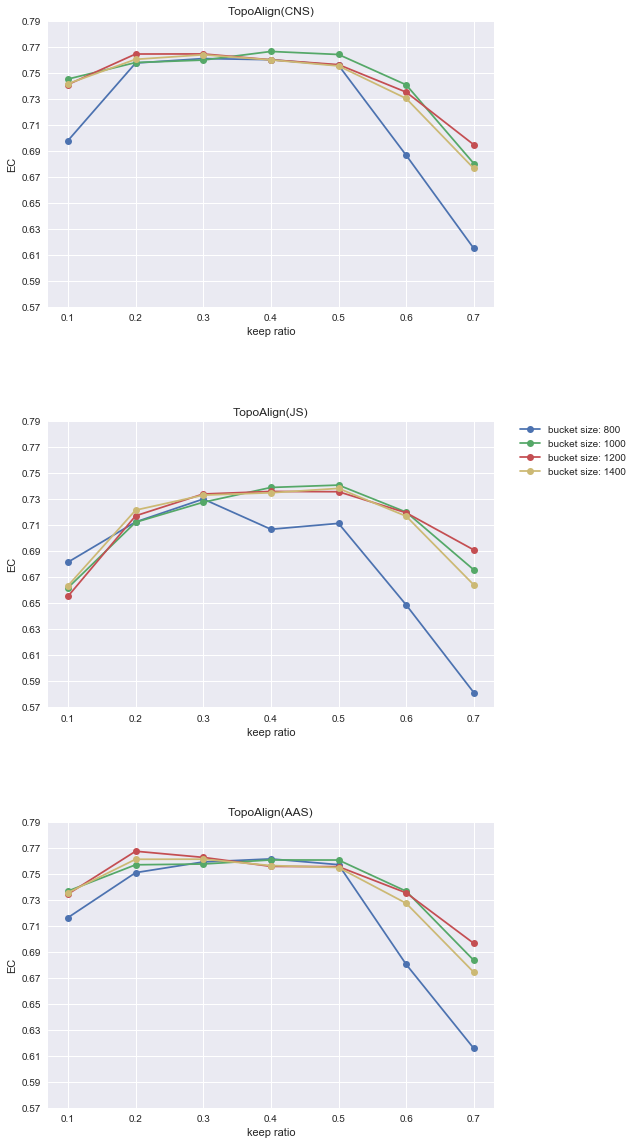

In [33]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)
colors = ['b', 'g', 'r', 'y']

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = keep_ratio
    alg = our_algs[i]
    alg_name = alg_names[i]
    color_ind = 0
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs1['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name, color=colors[color_ind])
        color_ind += 1
    
    ax.set_yticks(np.arange(0.57, 0.8, 0.02))
    ax.set_xlabel('keep ratio')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)
    
plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("bucket-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'


### Seed - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


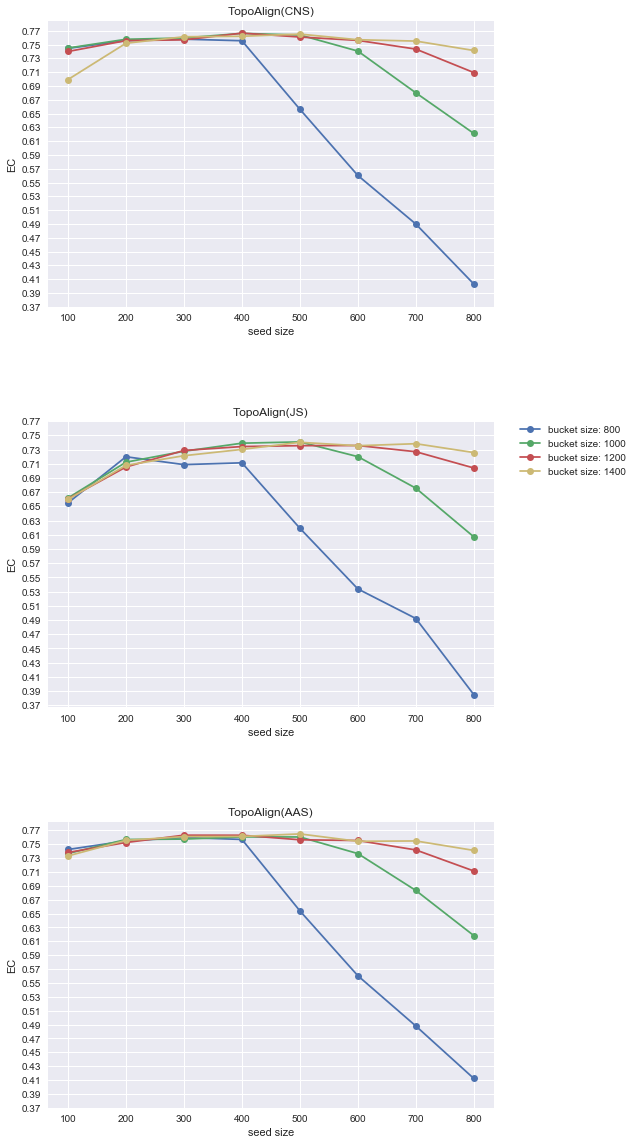

In [32]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

colors = ['b', 'g', 'r', 'y']

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = seed_size
    alg = our_algs[i]
    alg_name = alg_names[i]
    color_ind = 0
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs2['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name, color=colors[color_ind])
        color_ind += 1
    
    ax.set_yticks(np.arange(0.37, 0.78, 0.02))
    ax.set_xlabel('seed size')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)

plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.savefig("seed-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'

## Betweenness Centrality - Node Degree Plot
---

In [13]:
%%capture
# create the combined biological alignment network
bio_net = organism.BioNet(organism_objs[0], organism_objs[1], 'raw_blast')

sim_dim = (bio_net.org1.node_count, bio_net.org2.node_count)
net_sim = bio_net.similarity.reshape(sim_dim)
net_pure_sim = bio_net.blast_sim.reshape(sim_dim)

G1 = nx.Graph()
G1.add_nodes_from(range(bio_net.org1.node_count))
G1.add_edges_from(bio_net.org1.edges)

G2 = nx.Graph()
G2.add_nodes_from(range(bio_net.org2.node_count))
G2.add_edges_from(bio_net.org2.edges)

BC1 = nx.betweenness_centrality(G1)
BC2 = nx.betweenness_centrality(G2)

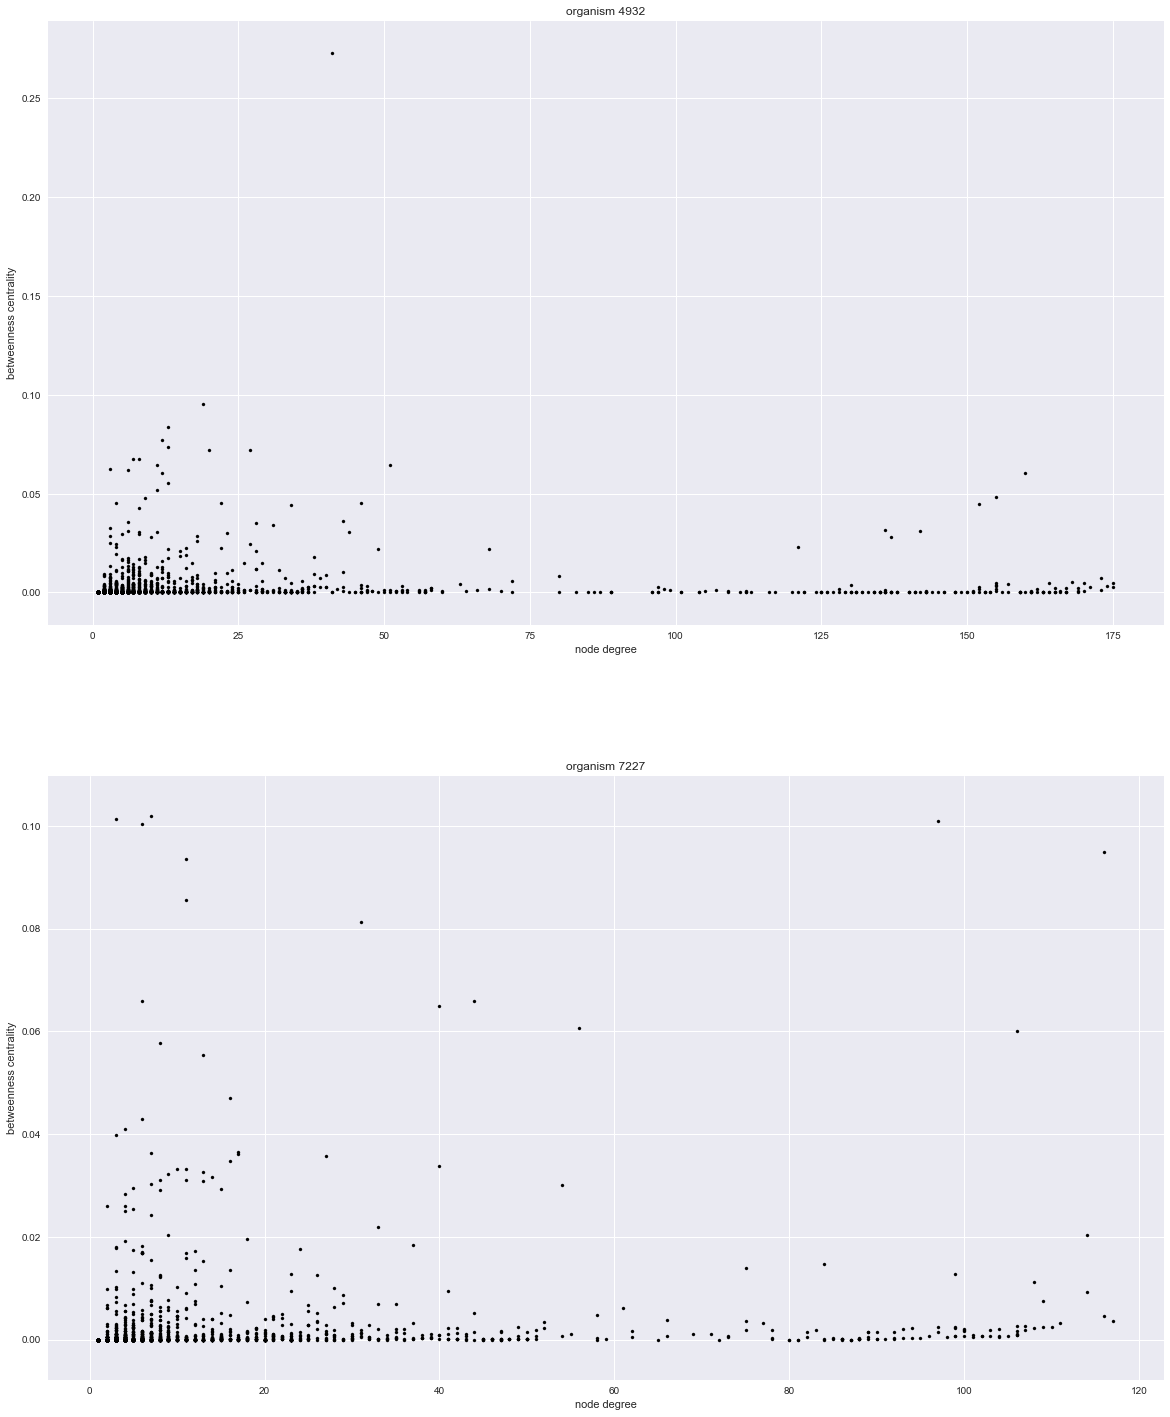

In [88]:
DEG1, VAL1 = [], []
for node, value in BC1:
    DEG1.append(bio_net.org1.degree[node])
    VAL1.append(value)

DEG2, VAL2 = [], []
for node, value in BC2:
    DEG2.append(bio_net.org2.degree[node])
    VAL2.append(value)

colors = (0, 0, 0)
area = np.pi*3

plt.subplot(211)
plt.scatter(DEG1, VAL1, s=area, c=colors)

plt.title('organism 4932')
plt.ylabel('betweenness centrality')
plt.xlabel('node degree')


plt.subplot(212)
plt.scatter(DEG2, VAL2, s=area ,c=colors)
plt.rcParams["figure.figsize"] = [18, 25]

plt.title('organism 7227')
plt.ylabel('betweenness centrality')
plt.xlabel('node degree')


plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.savefig("bc-degree.pdf", bbox_inches='tight')
plt.show()

In [19]:
from math import log

CentralityCoef = 1
blast_data = []

BC1List = sorted([(node, value) for node, value in BC1.items()], key=lambda tup:tup[1], reverse=True)[:1200]
BC2List = sorted([(node, value) for node, value in BC2.items()], key=lambda tup:tup[1], reverse=True)[:1200]


for pair1 in BC1List:
    for pair2 in BC2List:
        if((pair1[1]) == 0 or (pair2[1]) == 0):
            continue;
        blast_data.append((pair1[1] - pair2[1], bio_net.org1.degree[pair1[0]] - bio_net.org2.degree[pair2[0]], net_sim[pair1[0]][pair2[0]] * 1000))
        
        
blast_data = sorted(blast_data, key=lambda tup: tup[2], reverse=True)
delimiter = [0.1, 0.15, 0.2, 0.85]

BLAST = [[] for _ in range(3)]
CEN_DIFF = [[] for _ in range(3)]
DEGREE_DIFF = [[] for _ in range(3)]

for tup in blast_data:
    if(tup[2] >= delimiter[0] and tup[2] < delimiter[1]):
        BLAST[0].append(tup[2])
        CEN_DIFF[0].append(-log(1 / abs(tup[0])))
        DEGREE_DIFF[0].append(abs(tup[1]))
        
    elif(tup[2] >= delimiter[1] and tup[2] < delimiter[2]):
        BLAST[1].append(tup[2])
        CEN_DIFF[1].append(-log(1 / abs(tup[0])))
        DEGREE_DIFF[1].append(abs(tup[1]))
        
    elif(tup[2] >= delimiter[2] and tup[2] < delimiter[3]):
        BLAST[2].append(tup[2])
        CEN_DIFF[2].append(-log(1 / abs(tup[0])))
        DEGREE_DIFF[2].append(abs(tup[1]))

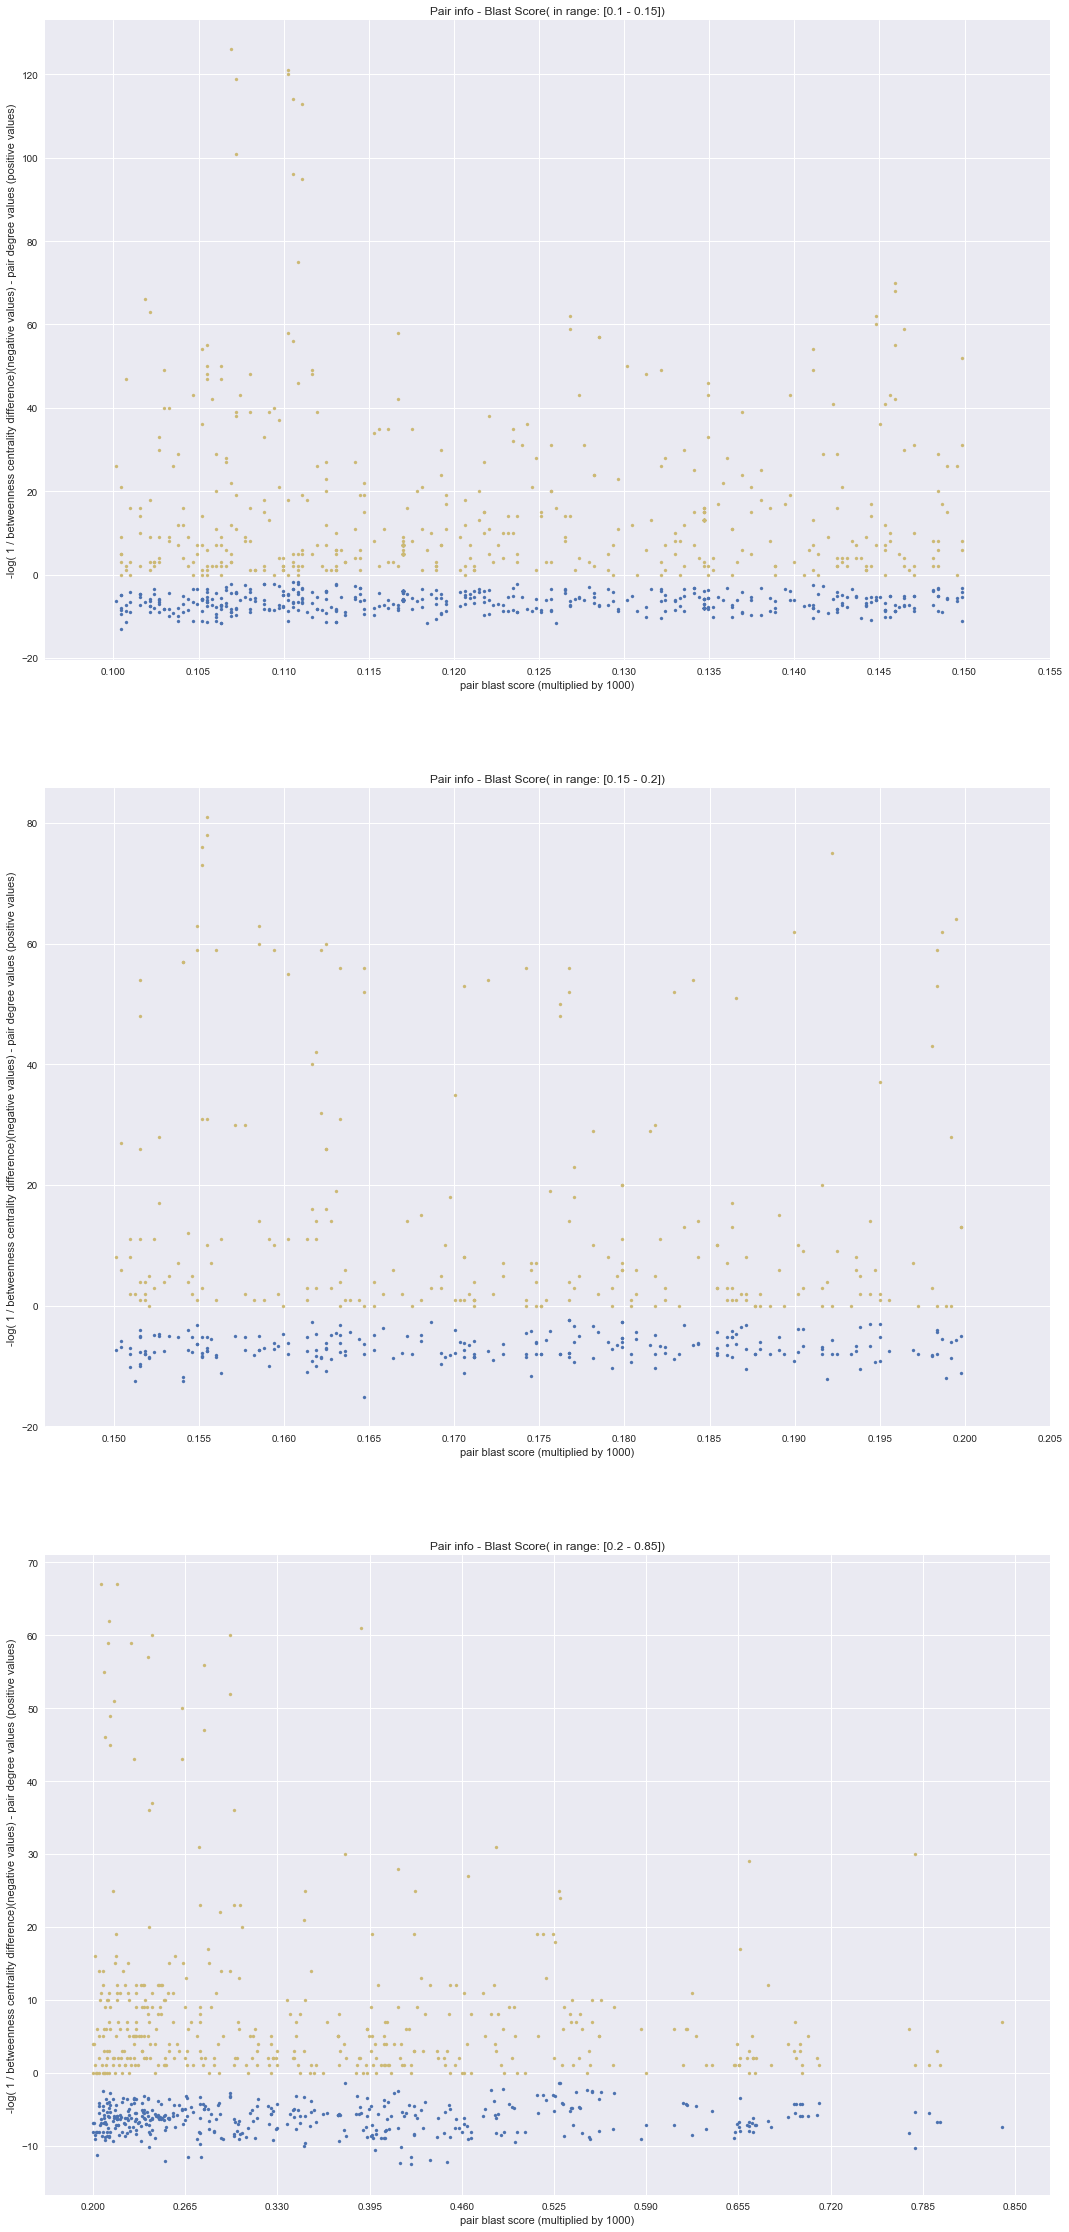

In [20]:
area = np.pi*3
plt.rcParams["figure.figsize"] = [18, 40]

for i in range(3):
    plt.subplot('31' + str(i + 1))
    plt.title("Pair info - Blast Score( in range: [{} - {}])".format(delimiter[i], delimiter[i+1]))
    plt.scatter(BLAST[i], DEGREE_DIFF[i], s=area, c='y')
    plt.scatter(BLAST[i], CEN_DIFF[i], s=area, c='b')
    plt.ylabel('-log( 1 / betweenness centrality difference)(negative values) - pair degree values (positive values)')
    plt.xlabel('pair blast score (multiplied by 1000)')
    plt.xticks(np.arange(delimiter[i], delimiter[i+1] + delimiter[i+1]/20, (delimiter[i+1] - delimiter[i]) / 10))
    
plt.savefig("pair info-blast.pdf", bbox_inches='tight')
plt.show()

## Matching Parameter Comparison (Organisms: yeast-fly)
---

Bucket size: 1200, Seed keep ratio: 0.3

In [ ]:
%%capture

# list of our algorithms
our_algs = ['seedexBC']

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

#matching parameters (Blast coef, Degree Coef, Betweeenness Coef)
params = []

for c1 in range(0, 11):
    for c2 in range(0, 11):
        if c1 + c2 > 10:
            break
        c3 = 10 - c1 - c2
        params.append((c1/10, c2/10, c3/10))
        

alldata = []
   
for alg in our_algs:
    data = []
    for param in params:
        cs.BLAST_COEF = param[0]
        cs.DEGREE_COEF = param[1]
        cs.SEED_FACTOR_COEF = param[2]

        aln = alignment_result(orgs, alg)
        data.append(aln)

    df = pd.DataFrame(data=data, columns=columns, index=params)
    df.columns.name = '(Blast, Degree, BC)'
    
    alldata.append(df)
    
calldfs = pd.concat(alldata, axis=0, keys=our_algs)

In [6]:
display(calldfs)

(Blast, Degree, BC)          CE        EC  LCCS       ICS       S^3  \
seedexBC (0.1, 0.0, 0.9)  10472  0.763321   791  0.509785  0.440203   
         (0.1, 0.1, 0.8)  10536  0.767986   785  0.512726  0.443958   
         (0.1, 0.2, 0.7)  10520  0.766820   791  0.513622  0.444238   
         (0.1, 0.3, 0.6)  10501  0.765435   673  0.511321  0.442054   
         (0.1, 0.4, 0.5)  10506  0.765799   789  0.511465  0.442283   
         (0.1, 0.5, 0.4)  10501  0.765435   790  0.510277  0.441274   
         (0.1, 0.6, 0.3)  10495  0.764997   817  0.510408  0.441226   
         (0.1, 0.7, 0.2)  10495  0.764997   817  0.510308  0.441152   
         (0.1, 0.8, 0.1)  10515  0.766455   814  0.511928  0.442849   
         (0.1, 0.9, 0.0)  10536  0.767986   797  0.511506  0.443043   
         (0.2, 0.0, 0.8)  10504  0.765653   788  0.511069  0.441939   
         (0.2, 0.1, 0.7)  10509  0.766018   815  0.511213  0.442168   
         (0.2, 0.2, 0.6)  10538  0.768132   824  0.512499  0.443836   
         (0.2, 0.3, 0.5)  10513  0.766309   811  0.511233  0.442280   
         (0.2, 0.4, 0.4)  10512  0.766237   817  0.513156  0.443694   
         (0.2, 0.5, 0.3)  10539  0.768205   825  0.513897  0.444909   
         (0.2, 0.6, 0.2)  10537  0.768059   821  0.513850  0.444824   
         (0.2, 0.7, 0.1)  10530  0.767549   822  0.512558  0.443686   
         (0.2, 0.8, 0.0)  10549  0.768934   794  0.513059  0.444524   
         (0.3, 0.0, 0.7)  10525  0.767184   825  0.511046  0.442431   
         (0.3, 0.1, 0.6)  10488  0.764487   818  0.510489  0.441117   
         (0.3, 0.2, 0.5)  10554  0.769298   822  0.514578  0.445787   
         (0.3, 0.3, 0.4)  10496  0.765070   819  0.510183  0.441083   
         (0.3, 0.4, 0.3)  10522  0.766966   821  0.511497  0.442696   
         (0.3, 0.5, 0.2)  10543  0.768496   820  0.512219  0.443748   
         (0.3, 0.6, 0.1)  10578  0.771047   822  0.514144  0.446047   
         (0.3, 0.7, 0.0)  10530  0.767549   795  0.512608  0.443723   
         (0.4, 0.0, 0.6)  10488  0.764487   823  0.512911  0.442924   
         (0.4, 0.1, 0.5)  10544  0.768569   817  0.512666  0.444107   
         (0.4, 0.2, 0.4)  10556  0.769444   824  0.513924  0.445344   
         (0.4, 0.3, 0.3)  10520  0.766820   823  0.513221  0.443938   
         (0.4, 0.4, 0.2)  10531  0.767622   819  0.511586  0.442982   
         (0.4, 0.5, 0.1)  10538  0.768132   820  0.512948  0.444173   
         (0.4, 0.6, 0.0)  10532  0.767694   804  0.512406  0.443621   
         (0.5, 0.0, 0.5)  10515  0.766455   822  0.511729  0.442700   
         (0.5, 0.1, 0.4)  10523  0.767038   825  0.512218  0.443260   
         (0.5, 0.2, 0.3)  10511  0.766164   821  0.512657  0.443296   
         (0.5, 0.3, 0.2)  10503  0.765581   820  0.511742  0.442418   
         (0.5, 0.4, 0.1)  10544  0.768569   818  0.512218  0.443771   
         (0.5, 0.5, 0.0)  10537  0.768059   799  0.512799  0.444037   
         (0.6, 0.0, 0.4)  10514  0.766382   817  0.512328  0.443124   
         (0.6, 0.1, 0.3)  10561  0.769808   819  0.514117  0.445612   
         (0.6, 0.2, 0.2)  10516  0.766528   819  0.511429  0.442499   
         (0.6, 0.3, 0.1)  10528  0.767403   818  0.513110  0.444051   
         (0.6, 0.4, 0.0)  10515  0.766455   795  0.511281  0.442364   
         (0.7, 0.0, 0.3)  10519  0.766747   820  0.513473  0.444102   
         (0.7, 0.1, 0.2)  10525  0.767184   821  0.513239  0.444074   
         (0.7, 0.2, 0.1)  10513  0.766309   820  0.511333  0.442355   
         (0.7, 0.3, 0.0)  10562  0.769881   802  0.514166  0.445673   
         (0.8, 0.0, 0.2)  10511  0.766164   820  0.512407  0.443109   
         (0.8, 0.1, 0.1)  10511  0.766164   822  0.511484  0.442419   
         (0.8, 0.2, 0.0)  10551  0.769079   792  0.514031  0.445303   
         (0.9, 0.0, 0.1)  10528  0.767403   812  0.514892  0.445385   
         (0.9, 0.1, 0.0)  10537  0.768059   800  0.512151  0.443551   
         (1.0, 0.0, 0.0)  10535  0.767913   816  0.513201  0.444290   

(Blast, Degree, BC)    